In [95]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [59]:
dataframe = pd.read_csv("detected_languages.csv")
dataframe.columns = ['Poem_ID','Poem_lang','Poem_userlang']
dataframe.head()

,Poem_ID,Poem_lang,Poem_userlang
0,-KOtUxwNobZudSWCIth4,en,en_US
1,-KOtVKofxMz7vciJP8LE,en,en_US
2,-KOtVVbMUEzT1e533nOR,en,en_US
3,-KOtVip8C5LYExx_YfTp,en,en_US
4,-KOtW-y-9D6IuHSfqBSh,en,en_US


In [13]:
dataframe.count()

Poem_ID          9390
Poem_lang        9390
Poem_userlang    9390
dtype: int64

In [114]:
moods = pd.read_csv("moods.csv", sep = ',')
moods.columns = ['Poem_ID', 'Poem_mood']
print(moods.head())

moods.Poem_mood.unique()

                Poem_ID Poem_mood
0  -KOtUxwNobZudSWCIth4       Joy
1  -KOtVKofxMz7vciJP8LE      Fear
2  -KOtVVbMUEzT1e533nOR     Anger
3  -KOtVip8C5LYExx_YfTp       Joy
4  -KOtW-y-9D6IuHSfqBSh   Sadness


array(['Joy', 'Fear', 'Anger', 'Sadness', 'Confident', 'Tentative',
       'Analytical', nan], dtype=object)

In [64]:
combined_df = pd.merge(dataframe, moods, on = 'Poem_ID')
combined_df.head()

,Poem_ID,Poem_lang,Poem_userlang,Poem_mood
0,-KPOHxLHscJMMfTwuUME,en,en_US,\tJoy
1,-KSEyYYldkGgboPrLcsb,hi,hi_IN,\tFear
2,-KUmvctEShybWeogifDm,hi,hi_IN,\tJoy
3,-KVGMQAYKYdxHGxxLnxL,hi,hi_IN,\tSadness
4,-KVznqDTcjvBmqi-MHOH,hi,hi_IN,Confident


In [83]:
dataframe.Poem_lang.unique()

array([' en', ' hi', ' sw', ' de', ' ml', ' et', ' id', ' so', ' fi',
       ' sv', ' af', ' gu', ' sl', ' ur', ' mr', ' tl', ' pa', ' sq',
       ' nl', ' ne', ' cy', ' es', ' bn', ' fr', ' lv', ' kn', ' ca',
       ' hr', ' pt', ' pl', ' tr', ' vi', ' hu', ' no', ' da'],
      dtype=object)

### Replace the languages symbols with numbers

In [248]:
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("en",1)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("hi",2)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("sw",3)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("de",4)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("ml",5)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("et",6)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("id",7)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("so",8)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("fi",9)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("sv",10)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("af",11)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("gu",12)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("sl",13)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("ur",14)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("mr",15)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("tl",16)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("pa",17)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("sq",18)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("nl",19)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("ne",20)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("cy",21)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("es",22)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("bn",23)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("fr",24)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("lv",25)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("kn",26)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("ca",27)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("hr",28)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("pt",29)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("pl",30)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("tr",31)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("vi",32)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("hu",33)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("no",34)
dataframe["Poem_lang"]=dataframe["Poem_lang"].replace("da",35)

# pd.to_numeric(dataframe.Poem_lang())
# dataframe = dataframe.drop(columns =['Poem_userlang'])

print(dataframe.head())

                 Poem_ID  Poem_lang
0   -KOtUxwNobZudSWCIth4          1
1   -KOtVKofxMz7vciJP8LE          1
2   -KOtVVbMUEzT1e533nOR          1
3   -KOtVip8C5LYExx_YfTp          1
4   -KOtW-y-9D6IuHSfqBSh          1


### Replace Poem_mood with numbers as well to use NearestNeighbors

In [247]:
moods["Poem_mood"]= moods["Poem_mood"].replace("Joy", 1)
moods["Poem_mood"]= moods["Poem_mood"].replace("Anger", 2)
moods["Poem_mood"]= moods["Poem_mood"].replace("Fear", 3)
moods["Poem_mood"]= moods["Poem_mood"].replace("Sadness", 4)
moods["Poem_mood"]= moods["Poem_mood"].replace("Confident", 5)
moods["Poem_mood"]= moods["Poem_mood"].replace("Analytical", 6)
moods["Poem_mood"]= moods["Poem_mood"].replace("Tentative", 7)

print(moods.head())

                Poem_ID  Poem_mood
0  -KOtUxwNobZudSWCIth4        1.0
1  -KOtVKofxMz7vciJP8LE        3.0
2  -KOtVVbMUEzT1e533nOR        2.0
3  -KOtVip8C5LYExx_YfTp        1.0
4  -KOtW-y-9D6IuHSfqBSh        4.0


In [245]:
# liked_poems['Poem_lang'].count()
useful = liked_poems.groupby('Poem_lang')['No_of_likes'].sum()
print(useful)


Poem_lang
af      0
de      1
en     99
et      1
fi      0
hi    169
id     62
ml      4
so      5
sv      0
sw      3
Name: No_of_likes, dtype: int64


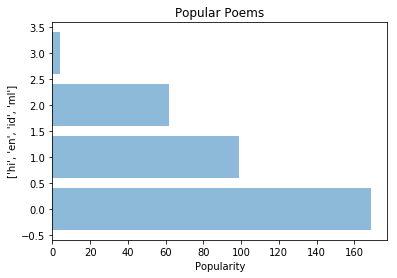

In [244]:
hindi = liked_poems.loc[liked_poems['Poem_lang'] == 'hi', 'No_of_likes'].sum()
english = liked_poems.loc[liked_poems['Poem_lang'] == 'en', 'No_of_likes'].sum()
indo = liked_poems.loc[liked_poems['Poem_lang'] == 'id', 'No_of_likes'].sum()
mallu = liked_poems.loc[liked_poems['Poem_lang'] == 'ml', 'No_of_likes'].sum()
performance = [hindi, english, indo, mallu]
Objects = ['hi','en','id','ml']
y_pos = np.arange(len(Objects))

plt.barh(y_pos,performance,align='center',alpha = 0.5)
plt.xlabel('Popularity')
plt.title('Popular Poems')
plt.ylabel(Objects)
plt.show()

### Give the test parameter manually in this case

In [249]:
print (pd.merge(dataframe, moods, on='Poem_ID'))


# combined_data = dataframe.join(moods, on = 'Poem_ID')
# combine_data.head()

NameError: name 'Poem_moods' is not defined